In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import L2

In [2]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import normalize
from tensorflow import convert_to_tensor

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

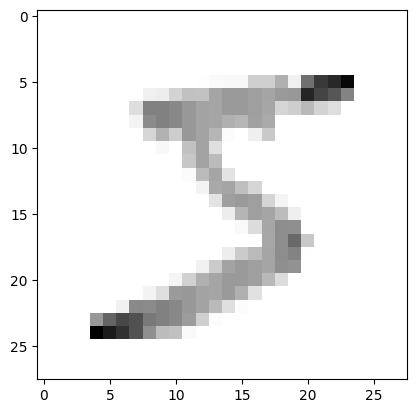

In [8]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [11]:
l2 = L2(l2=0.02)
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2))
model.add(Dense(256, activation='tanh', kernel_regularizer=l2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2))
model.add(Dense(10))

loss = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [12]:
X_train = convert_to_tensor(X_train)

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=10, batch_size=128, verbose=1)

Epoch 1/10
375/375 [==============================] - 10s 11ms/step - loss: 3.2581 - accuracy: 0.8083 - val_loss: 1.2899 - val_accuracy: 0.8543
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 1.2067 - accuracy: 0.8610 - val_loss: 1.1511 - val_accuracy: 0.8562
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 1.1019 - accuracy: 0.8706 - val_loss: 1.0720 - val_accuracy: 0.8697
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 1.0333 - accuracy: 0.8792 - val_loss: 1.0109 - val_accuracy: 0.8845
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.9903 - accuracy: 0.8856 - val_loss: 0.9561 - val_accuracy: 0.8943
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.9519 - accuracy: 0.8890 - val_loss: 0.9186 - val_accuracy: 0.8997
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.9193 - accuracy: 0.8941 - val_loss: 0.9003 - val_accuracy: 0.9029
Epo

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8474 - accuracy: 0.9044
0.8474027514457703 0.9043999910354614


In [15]:
predictions = model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [16]:
print(np.argmax(predictions[0]))

7


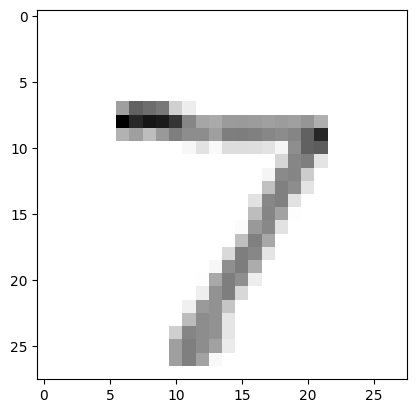

In [17]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

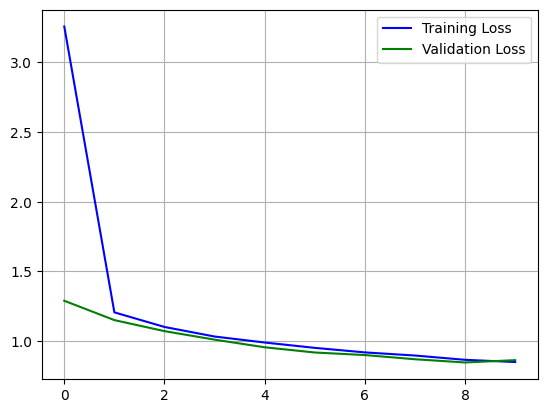

In [18]:
plt.plot(history.history['loss'], c='b', label='Training Loss')
plt.plot(history.history['val_loss'], c='g', label='Validation Loss')
plt.grid()
plt.legend(loc='best')
plt.show()

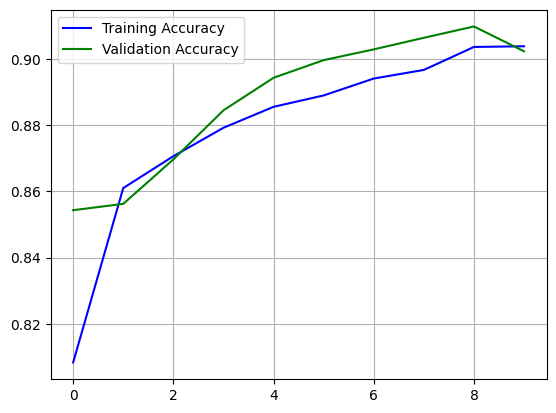

In [19]:
plt.plot(history.history['accuracy'], c='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c='g', label='Validation Accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()